# NumPy  SciPy

In [1]:
import numpy as np

## Задание 1 ★★☆

Разбейте массив на убывающие подмассивы.  
Подсказка: np.diff()  
Используйте библиотеку `numpy`, не используйте циклы.

In [5]:
def function_1(arr):
    # TODO
    difference = np.diff(arr)
    split_index = np.where(difference >= 0)[0]+1
    split_arr = np.split(arr, split_index)
    return split_arr

Проверка

In [6]:
function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])

[array([3, 2, 1]), array([4]), array([5, 2, 0]), array([2]), array([4, 1])]

In [7]:
len(function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])) == 5

True

In [8]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 10, size=20))) == 9

True

In [9]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 100, size=10))) == 4

True

Значение для формы

In [10]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
print(len(function_1(a)))

505


## Задание 2 ★★☆

Дан массив arr, необходимо найти среднее значение внутри групп, группа определена массивом g. Например, для  
`arr = [4, 2, 1, 5, 2, 5, 1, 3]` и   
`g =   [0, 1, 1, 0, 1, 0, 1, 0]` (4 относится к группе 0, 2 к группе 1 и т. д.)   
Средние по группам: `[4.25, 1.5]`  
Подсказка: `np.bincount()`   
Используйте библиотеку `numpy`, не используйте циклы.

In [11]:
def function_2(arr, g):
    # TODO
    return np.bincount(g, weights=arr)/np.bincount(g)

Проверочный код

In [12]:
all(function_2(np.array([4, 2, 1, 5, 2, 5, 1, 3]), np.array([0, 1, 1, 0, 1, 0, 1, 0])) == [4.25, 1.5])

True

In [13]:
np.random.seed(42)
all(function_2(np.random.randint(0, 25, size=10), np.random.randint(0, 3, size=10)) == [12., 15.2, 10.])

True

In [14]:
np.random.seed(42)
all(function_2(np.random.randint(0, 100, size=10), np.random.randint(0, 4, size=10)) == [89., 78., 20., 54.])

True

Значение для формы

In [15]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
g = np.random.randint(0, 20, 1000)
print(np.round(function_2(a, g).sum(), 4))

30021.8043


## Задание 3 ★★★

Предположим нам даны две выборки-матрицы: обучающая X_train (размер l1 x n) и тестовая X_test (размер l2 x n), каждая строка в матрице - это вектор, описывающий объект в n-мерном пространстве. Допустим, что в ходе некоторой задачи потребовалось вычислить расстояние между векторами из тестовой и обучающей выборки. То есть для каждой строки-вектора из тестовой выборки нужно найти расстояние до каждого вектора из обучающей, таким образом мы получим матрицу dist размера l1 x l2.   

В этом задании необходимо получить матрицу расстояний dist, **не используя циклы**.
Для начала, попробуйте это сделать через два цикла и сравните эффективность с конечной реализацией через numpy.  

In [2]:
# через циклы
def function_3(X_train, X_test):
    # TODO 
    dist = np.zeros((X_train.shape[0], X_test.shape[0]))
    for i in range(X_train.shape[0]):
        for j in range(X_test.shape[0]):
            dist[i, j] = np.linalg.norm(X_train[i,:]-X_test[j, :])
                    
    return dist

In [23]:
# через нампай
def function_3(X_train, X_test):
    # TODO 
    XX = np.einsum('ij,ij->i', X_train, X_train)[:, np.newaxis]
    YY = np.einsum('ij,ij->i', X_test, X_test)[np.newaxis, :]
    
    distances = X_train @X_test.T
    distances *= -2
    distances += XX
    distances += YY
    np.maximum(distances, 0, out=distances)
    return np.sqrt(distances, out=distances)

Значение для формы

In [24]:
%%time
np.random.seed(42)
X_train, X_test = np.random.rand(60000, 3000), np.random.rand(1000, 3000)
dist = function_3(X_train, X_test)
print(np.round(dist.sum(), 4))

1341747083.8534
CPU times: user 12.6 s, sys: 1.65 s, total: 14.2 s
Wall time: 10.2 s


## Задание 4 ★☆☆

Реализуйте функцию вычисляющую приближенную матрицу $X_k$  для матрицы $X$ заданного ранга $k$ по норме Фробениуса.   
Подсказка:   
см. семнар SciPy  
scipy.linalg.svd  

In [10]:
import scipy

In [11]:
def function_4(X, k):
    # TODO
    U, s, Vh = scipy.linalg.svd(X)
    S = np.diag(s)
    return U[:, :k] @ S[:k, :k] @Vh[:k, :]

Проверка

In [12]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 3)
(scipy.linalg.norm(X - X_k) < 2 and np.linalg.matrix_rank(X_k) == 3)

True

In [13]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 4)
(scipy.linalg.norm(X - X_k) < 1e-10 and np.linalg.matrix_rank(X_k) == 4)

True

Значение для формы

In [14]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(100, 150))
X_k = function_4(X, 40)
print(np.round(scipy.linalg.norm(X - X_k), 3) * np.linalg.matrix_rank(X_k))

7279.84


## Задание 5 ★★☆

Найдите тангенс угла наклона прямой, такой что максимальное расстояние от точек $X$ до прямой минимально. Cчитайте, что прямая проходит через начало координат.

In [52]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]

In [37]:
X[:, 0, np.newaxis].shape

(569, 1)

In [44]:
def function_5(points):
    # TODO
    x = points[:, 0, np.newaxis]
    y = points[:, 1, np.newaxis]
    W = np.linalg.inv(x.T @ x) @ x.T @ y
    return W[0][0]

In [45]:
function_5(X)

1.3086742363117636

In [49]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

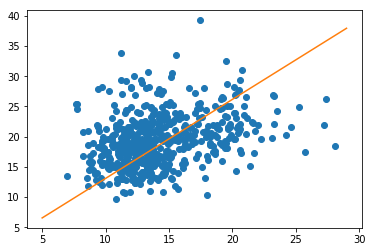

In [58]:
plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(np.arange(5, 30), np.arange(5, 30)*function_5(X))

Значение для формы

In [46]:
print(round(function_5(X), 3))

1.309
